In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import src.utils as utils


utils.configure_pd(pd)
utils.configure_plt(plt)

def q_fn(grid, z, prop_sd):
    return stats.norm.pdf(grid, loc=z+0, scale=prop_sd)

def alpha_fn(grid, x):
    alpha_x = stats.norm.pdf(grid, loc=0, scale=1)
    alpha_x = alpha_x/stats.norm.pdf(x, loc=0, scale=1)
    alpha_x[alpha_x>1]=1
    return alpha_x

def all_q_fn(grid, x, y, prop_sd):
    q_x = q_fn(grid, x, prop_sd)
    q_y = q_fn(grid, y, prop_sd)
    q_min = np.minimum(q_x, q_y)
    return q_x, q_y, q_min

def all_alpha_fn(grid, x, y):
    alpha_x = alpha_fn(grid, x)
    alpha_y = alpha_fn(grid, y)
    alpha_min = np.minimum(alpha_x, alpha_y)
    return alpha_x, alpha_y, alpha_min

def all_p_fn(q_x, q_y, alpha_x, alpha_y):
    p_x = q_x * alpha_x
    f_y = q_y * alpha_y
    f_min = np.minimum(p_x, f_y)
    return p_x, f_y, f_min

In [2]:
# Compute main lines to be plotted
grid = np.linspace(-11, 18, 1500)
x, y, prop_sd = .25, 4, np.sqrt(10)

q_x, q_y, q_min = all_q_fn(grid,x,y,prop_sd)
alpha_x, alpha_y, alpha_min = all_alpha_fn(grid,x,y)
f_x, f_y, f_min = all_p_fn(q_x,q_y,alpha_x,alpha_y)

dg = grid[1]-grid[0]
rx = 1 - sum(f_x*dg)
ry = 1 - sum(f_y*dg)

sq_meet = sum(q_min*alpha_min*dg)
c_meet = sum(f_min*dg)
print(f'M_SQ = {sq_meet:0.2f}, M_C = {c_meet:0.2f}, Ratio = {c_meet/sq_meet:0.2f}')

M_SQ = 0.15, M_C = 0.19, Ratio = 1.30


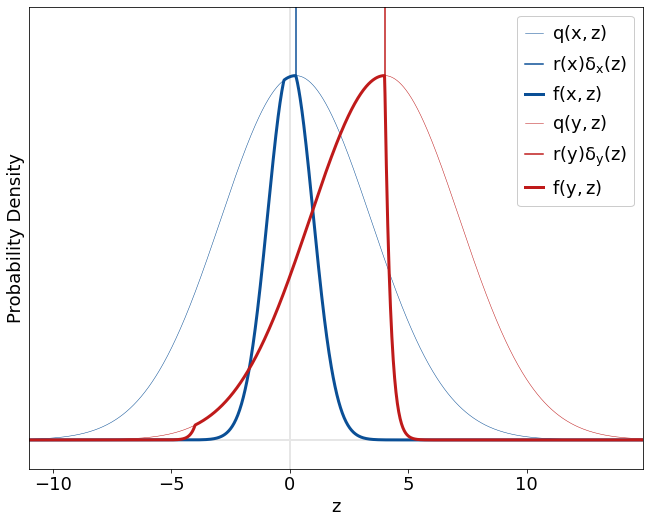

In [3]:
# Figure 1: q and f distributions
_, ax = plt.subplots()

lw = 3

ht_x = [0,q_fn(x,x,prop_sd)][1]
ht_y = [0,q_fn(y,y,prop_sd)][1]

lab_px0 = r'$f(x,z)$'# = q(x,z) a(x,z)$'
lab_py0 =r'$f(y,z)$'#= q(x,z) a(x,z)$'

plt.plot(grid, q_x, label=r'$q(x,z)$', c=utils.dark_blue, linewidth=.5)
plt.plot([x,x+1e-8], [ht_x,1], label=r'$r(x) \delta_x(z) $',
         c=utils.dark_blue, linewidth=1.5,)
plt.plot(grid, f_x, label=lab_px0, c=utils.dark_blue, linewidth=lw)

plt.plot(grid, q_y, c=utils.dark_red, label=r'$q(y,z)$', linewidth=.5)
plt.plot([y,y+1e-8],[ht_y,1],label=r'$r(y) \delta_y(z) $',
         linewidth=1.5, c=utils.dark_red)
plt.plot(grid, f_y, c=utils.dark_red, label=lab_py0, linewidth=lw)

plt.yticks([])
ax.grid(False)
plt.axhline(0, linewidth=2, color='0.9', zorder=-1)
plt.axvline(0, linewidth=2, color='0.9', zorder=-1)

plt.legend(ncol=1, columnspacing=.75, handletextpad=.5, handlelength=1, framealpha=1)
plt.xlim(-11, 14.9)
plt.ylim(ymin=-.01, ymax=.15)
plt.xlabel('z')
plt.ylabel('Probability Density')

plt.show()

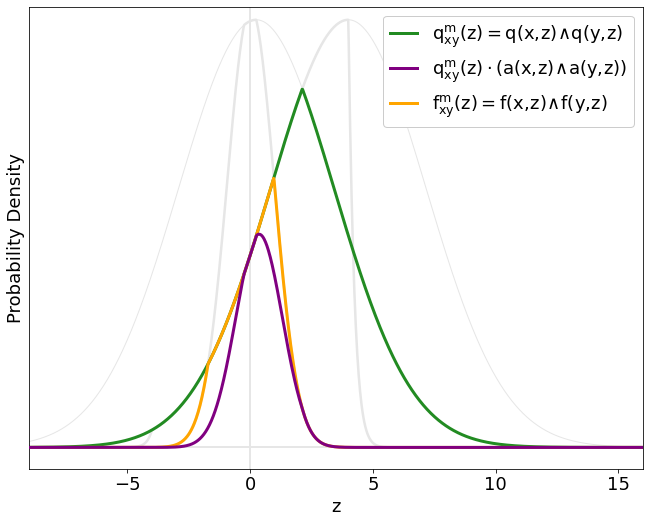

In [4]:
# Figure 3: maximal vs. heuristic meeting probabilities
_, ax = plt.subplots()

q_label = r'$q^m_{xy}(z) = q(x,\! z)\! \wedge \! q(y,\! z)$'
h_label = r'$q^m_{xy}(z) \cdot (a(x,\! z) \! \wedge\! a(y,\! z) )$'
f_label = r'$f^m_{xy}(z) = f(x,\! z)\! \wedge \! f(y,\! z)$'

lw = 3
plt.plot(grid, q_min, label=q_label, linewidth=lw, c='forestgreen', zorder=1)
plt.plot(grid, q_min*alpha_min, label=h_label, linewidth=lw, c='purple', zorder=3)
plt.plot(grid, f_min, label=f_label, linewidth=lw, c='orange', zorder=2)

plt.axhline(0, linewidth=2, color='0.9', zorder=-1)
plt.axvline(0, linewidth=2, color='0.9', zorder=-1)

al = 1
c_x = ['0.9',utils.dark_blue][0]
c_y = ['0.9',utils.dark_red][0]
plt.plot(grid, q_x, c=c_x, linewidth=1, alpha=al, zorder=0)
plt.plot(grid, q_y, c=c_y, linewidth=1, alpha=al, zorder=0)
plt.plot(grid, f_x, c=c_x, linewidth=2.5, alpha=al, zorder=0)
plt.plot(grid, f_y, c=c_y, linewidth=2.5, alpha=al, zorder=0)

plt.yticks([])
ax.grid(False)

plt.legend(ncol=1, columnspacing=1, handlelength=1.5,
           framealpha=1, loc='upper right')

plt.xlim(-9, 16)
plt.ylim(ymax=.13)
plt.xlabel('z')
plt.ylabel('Probability Density')

plt.show()

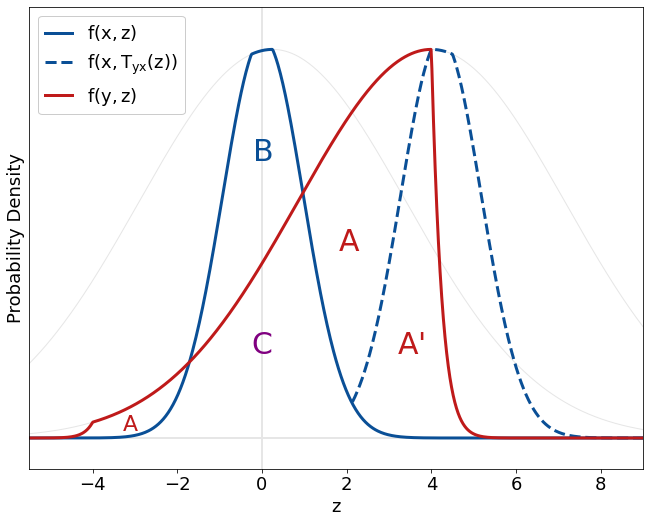

In [5]:
# Figure 4: explanation of the full-kernel couplings
m = (x + y)/2
grid_refl = 2*m - grid
q_x_refl = q_fn(grid_refl, x, prop_sd)
alpha_x_refl = alpha_fn(grid_refl, x)
p_x_refl = q_x_refl * alpha_x_refl
p_x_refl[p_x_refl<f_x] = np.nan

lw = 3

_, ax = plt.subplots()

plt.plot(grid, f_x, c=utils.dark_blue, label=r'$f(x, z)$', zorder=1, linewidth=lw)
plt.plot(grid, p_x_refl, c=utils.dark_blue, label=r'$f(x,T_{yx}(z))$',
         zorder=2, linestyle='--', linewidth=lw) #r'$f(x,\! x\!+\!R_e(z\!-\!y))$'
plt.plot(grid, f_y, c=utils.dark_red, label=r'$f(y, z)$',zorder=2, linewidth=lw)

plt.plot(grid, q_x, c='0.9', linewidth=1, zorder=0)
plt.plot(grid, q_y, c='0.9', linewidth=1, zorder=0)

plt.axhline(0, linewidth=2, color='0.9', zorder=-1)
plt.axvline(0, linewidth=2, color='0.9', zorder=-1)

y1 = 0.0275
y3 = 0.09
y2 = 0.061 #(y1+y3)/2
plt.annotate(r'$A$', xy=(-3.3, .0025), color=utils.dark_red, size=22)
plt.annotate(r'$A$', xy=(1.8, y2), color=utils.dark_red, size=30)
plt.annotate('$A$\'', xy=(3.2, y1), color=utils.dark_red, size=30)
plt.annotate(r'$B$', xy=(0.0, y3), horizontalalignment='center',
             color=utils.dark_blue, size=30)
plt.annotate(r'$C$', xy=(0.0, y1), horizontalalignment='center',
             color='purple', size=30)

plt.yticks([])
ax.grid(False)
plt.legend(ncol=1, columnspacing=1, handlelength=1.5, framealpha=1, loc='upper left')

plt.xlim(-5.5, 9)
plt.ylim(ymin=-.01, ymax=.14)
plt.xlabel('z')
plt.ylabel('Probability Density')

plt.show()

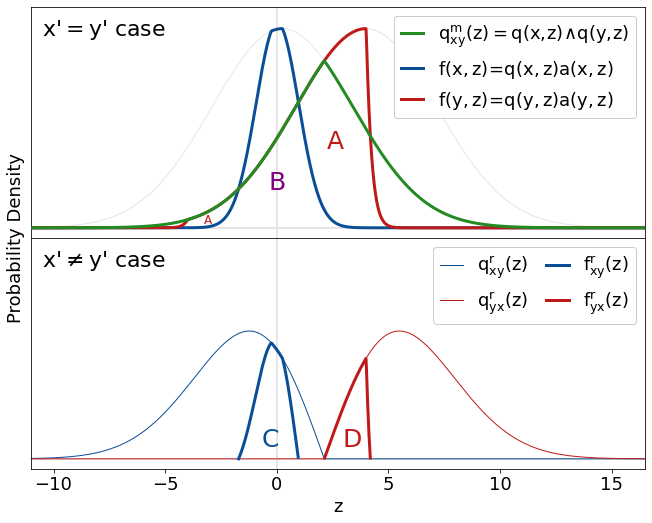

In [6]:
# Figure 5: explanation of the main algorithm
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, sharex='all', sharey='all')

x_min, x_max = -11, 16.5
lwq, lw = 1, 3

# upper plot (x' = y' case)
q_label = r'$q_{xy}^m(z) = q(x,\! z)\! \wedge \! q(y,\! z)$'
ax0.plot(grid, q_min, label=q_label, linewidth=3, c='forestgreen', zorder=5)
ax0.plot(grid, f_x, c=utils.dark_blue, label=r'$f(x,z) \! =\! q(x,z)a(x,z)$', linewidth=lw)
ax0.plot(grid, f_y, c=utils.dark_red, label=r'$f(y,z)\! =\! q(y,z)a(y,z)$', linewidth=lw)

ax0.annotate(r'$A$', xy=(-3.3, .0025), color=utils.dark_red, size=12)
ax0.annotate(r'$A$', xy=(2.2, .05), color=utils.dark_red, size=25)
ax0.annotate(r'$B$', xy=(0, .024),horizontalalignment='center', color='purple', size=25)
ax0.annotate(r"x'$=$y' case", xy=(-10.5,.122), size=22)

ax0.axhline(0, linewidth=2, color='0.9', zorder=-1)
ax0.axvline(0, linewidth=2, color='0.9', zorder=-1)

ax0.plot(grid, q_x, c='0.9', linewidth=1, zorder=0)
ax0.plot(grid, q_y, c='0.9', linewidth=1, zorder=0)

ax0.set_yticks([])
ax0.grid(False)
ax0.legend(ncol=1, columnspacing=1, handlelength=1.25, framealpha=1, loc='upper right')

# lower plot (x' != y' case)
qxr = q_x - q_min
qyr = q_y - q_min
pxr = np.maximum(0,f_x - q_min)
pyr = np.maximum(0,f_y - q_min)

pxr[np.isclose(pxr,0)] = np.nan
pyr[np.isclose(pyr,0)] = np.nan

ax1.plot(grid, qxr, c=utils.dark_blue, label=r'$q^r_{xy}(z)$', linewidth=lwq)
ax1.plot(grid, qyr, c=utils.dark_red, label=r'$q^r_{yx}(z)$', linewidth=lwq)

ax1.plot(grid, pxr, c=utils.dark_blue, label=r'$f^r_{xy}(z)$', linewidth=lw,zorder=2)
ax1.plot(grid, pyr, c=utils.dark_red, label=r'$f^r_{yx}(z)$', linewidth=lw,zorder=3)

ax1.annotate(r'$C$', xy=(-.7, .008), color=utils.dark_blue, size=25)
ax1.annotate(r'$D$', xy=(2.9, .008), color=utils.dark_red, size=25)
ax1.annotate(r"x'$\neq$y' case", xy=(-10.5,.122), size=22)

ax1.axhline(0, linewidth=2, color='0.9', zorder=-1)
ax1.axvline(0, linewidth=2, color='0.9', zorder=-1)

ax1.grid(False)

ax1.legend(ncol=2, columnspacing=1, handlelength=1.25, framealpha=1,
           loc='upper right')

ax1.set_xlabel('z')
ax1.set_ylabel('Probability Density')
ax1.yaxis.set_label_coords(-0.01, 1.0)

ax1.set_xlim(x_min, x_max) # shared x
ax1.set_ylim(ymax=.14) # shared y

fig.subplots_adjust(hspace=0)

plt.show()